# Data Mining final Project

For the project you are going to work in groups of 2.

## Aim
The aim of this project is to predict molecular properties.  You are going to work with molecular data and you have  to predict 4 molecular properties,  the Octanol-water partition coefficient (logP),  the number of rotatable bonds (RBN),  the molecular weight (MW) and the number of the rings (RN).

## Data

You are going to work using a subset the QM9 dataset.  The original QM9 dataset [Ramakrishnan et al.,2014)](ttps://www.nature.com/articles/sdata201422), contains $134k $ stable small organic molecules with up to 9 heavy atoms.


The data  consists of the following files:
1. QM9.txt
2. properties_QM9.npz

In **QM9.txt** the molecules are represented as SMILES  (Simplified molecular-input line-entry system).  SMILES strings proposed by Weininger (1988),  are non-unique representations which encode the molecular graph into a sequence of ASCII characters using a depth-first graph traversal.

For this project we ask you to predict 4 molecular properties,  the Octanol-water partition coefficient (logP),  the  number of rotatable bonds (RBN),  the molecular weight (MW) and the number of the rings (RN).  

- logP: represents a measure of the tendency of a compound to move from the aqueous phase into lipids
- Number of rotatable bonds (RBN):  the number of bonds which allow free rotation around themselves 
- Molecular weight (MW): the weight of a molecule based on the atomic masses of all atoms in the molecule
- Number of the rings (RN): the number of connected sets of atoms and bonds in which every atom and bond is a member of a cycle

**properties\_QM9.npz** file contains these 4 properties for the QM9.txt data.  


## Model
Before starting your analysis it is very important to understand the data and the objective of this project.

You are free to chose the representation of the data that you are going to use. If you want to work with one-hot-encoding data (see project.pdf for details) you can find the code to convert a single smile string to a one-hot encoding in `smile_to_hot()` function at `utils.py`.
 You can even use as input data different properties and descriptors (number of bonds,  number of atoms,  number of C, number of O e.t.c. )  that you can extract from your data  manually or using RDKit.  (The properties that we mention are random examples,  there are much more properties and descriptors for the molecules and you have to think what it makes sense for you to use). 

You are free to try different approaches and models,  you can use ready libraries for your algorithm. The main focus is to see the model you have come up but also the other approaches that you tried. You have to understand deeply all the algorithms that you have tried. 



Using load\_data() function in utils.py split the data and the corresponding properties  into train and test.  Use **cross-validation** to select the best model based on **statistical significant test**.  Only for the best model you will use the test data (of course you have to include in your report and present all the models that you have tried).   **It is mandatory to use three or more different algorithms in addition to a baseline**. 

(The baseline is the naive baseline algorithm,  providing context on just how good a given method actually is.)


The final model we would expect is a model that can work on universal data,  which means it can give a reasonable prediction on different molecular datasets.
 


## Report
You have to submit a formal report .  Your report has to include the approaches that you followed and main results not only for your final model but for all the models you have tried. We want a full picture of what exactly you have done and how. You should also discuss the different performances you have with your methods and explain why these work or not. What is important is to show us that you have a good understanding of the problem and of how to model it, what are the problems you encountered and how you solved them.


Note that this is an open project, you can try many different approaches as long as they make sense to get the best performance (creative ideas are always welcome).

## Final submission
For your final submission you have to submit on Moodle a folder named using your names (ex. NAME1_NAME2_DM_project) which should include your code (all the scripts), the dataset and your report (the report should also be saved using your names: NAME1_NAME2_DM_project.pdf).  If the size of your submission is big you can upload your submission on [SWITCH drive](https://www.switch.ch) and put on Moodle the shared link. 

## Installation Instructions
Below you will find some instructions about how to install some packages that required for the project through Conda.

[Conda](https://docs.conda.io/en/latest/) is a package manager that works on all the popular operating systems. If you do not already have it installed (e.g. through Anaconda) you can install it via Miniconda by following the instructions [here](https://docs.conda.io/en/latest/miniconda.html) -- it doesn't matter which version of Python you pick at this stage.  We can then setup the particular environment  using the [Conda yml file](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-from-an-environment-yml-file) I put in the folder of the project.


Assuming you have Conda installed,  install the environment by:

1. `conda env create -f DM_project_env.yml`
2. `conda activate DM_project`
3. And then finally check it worked correctly by running \$ `conda env list`

To **activate your enviroment** type: `$ conda activate DM_project`
and to deactivete it you should type `$ conda deactivate`




## Smiles - RDKit

Now we will see some examples how we can use RDKit to visualize the molecules and how we can extract different descriptors

In [1]:
import numpy as np

In [2]:
# import the parts of RDKit that we need
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit import DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor, rdMolDescriptors


from rdkit.Chem.Draw import IPythonConsole


import time
rdDepictor.SetPreferCoordGen(True)
print(rdkit.__version__)


2020.03.1


If get an error runing the previous cell 
- first check that you have installed correctly your enviroment (check if you can see it if you type in your termilal `$ conda env list`). 
- If the enviroment is installed correctly make sure that you have activated it (`$ conda activate DM_project`) before you opened the jupyter notebook.


##  Reading in SMILES strings

SMILES (Simplified molecular-input line-entry system) proposed by Weininger (1988) is a popular method to represent molecules as ASCII strings. The string is created by printing out the nodes found on a traversal of the molecular graph. The idea behind is to use simple line notations for chemical formulas that are based on some rules.


Atoms of chemical elements are represented by chemical symbols in capital letter, hydrogen is usually ignored. Single bonds are not displayed; for double, triple and quadruple bonds we shall use '=', '#', '$' respectively. Atoms that are bonded must stand nearby. Ring structures are written by breaking each ring at an arbitrary point (although some choices will lead to a more legible SMILES than others) to make a 'straight non-ring' structure (as if it wasn't a ring) and adding numerical ring closure labels to show connectivity between non-adjacent atoms. Aromacity is commonly illustrated by writing the constituent B, C, N, O, P and S atoms in lower-case forms b, c, n, o, p and s, respectively.




## RDKit


RDKit is a collection of cheminformatics and machine learning tools written in C++ and Python. It allows to work with many representations of chemical data and has a power to extract almost each chemical descriptor from the data you have. 

You can learn more about how to use RDKit, in the RDKit [documentation](http://www.rdkit.org/docs/index.html).

### Using RDKit

Let's start by defining a string variable containing the SMILES representation of the paracetemol (i.e. acetaminophen) molecule, a popular painkiller and reading it into RDKit.


### Visualization of molecules

In order to visualize the the SMILES we have to convert them to molecules. This happened running `Chem.MolFromSmiles`.



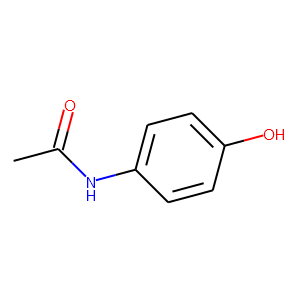

In [3]:
paracetemol_str = 'CC(=O)Nc1ccc(O)cc1'

# convert smile to mol
paracetemol_mol = Chem.MolFromSmiles(paracetemol_str)

# visualize mol
Draw.MolToImage(paracetemol_mol)

Once we have converted the SMILES to a RDKit `Mol` object (which happened when running `Chem.MolFromSmiles`) we can manipulate it in different ways. For example, we can iterate through the atoms or bonds:

In [4]:
# Iterate through the atoms. Print their symbol,  atomic number, and number of Hydrogens
for atm in paracetemol_mol.GetAtoms():
    print(f"Atom element: {atm.GetSymbol()}, atomic number: {atm.GetAtomicNum()}, number of hydrogens {atm.GetTotalNumHs()}")

    
print("\n\n")


# Iterate through the bonds
for bnd in paracetemol_mol.GetBonds():
    print(f"Bond from {bnd.GetBeginAtomIdx()} to {bnd.GetEndAtomIdx()} and is of type {bnd.GetBondType()}.")


Atom element: C, atomic number: 6, number of hydrogens 3
Atom element: C, atomic number: 6, number of hydrogens 0
Atom element: O, atomic number: 8, number of hydrogens 0
Atom element: N, atomic number: 7, number of hydrogens 1
Atom element: C, atomic number: 6, number of hydrogens 0
Atom element: C, atomic number: 6, number of hydrogens 1
Atom element: C, atomic number: 6, number of hydrogens 1
Atom element: C, atomic number: 6, number of hydrogens 0
Atom element: O, atomic number: 8, number of hydrogens 1
Atom element: C, atomic number: 6, number of hydrogens 1
Atom element: C, atomic number: 6, number of hydrogens 1



Bond from 0 to 1 and is of type SINGLE.
Bond from 1 to 2 and is of type DOUBLE.
Bond from 1 to 3 and is of type SINGLE.
Bond from 3 to 4 and is of type SINGLE.
Bond from 4 to 5 and is of type AROMATIC.
Bond from 5 to 6 and is of type AROMATIC.
Bond from 6 to 7 and is of type AROMATIC.
Bond from 7 to 8 and is of type SINGLE.
Bond from 7 to 9 and is of type AROMATIC.
Bo

Note that when we iterated through the atoms we also printed the number of hydrogen atoms attached. You may have spotted that these hydrogen atoms were not included in the original SMILES string. In general we ignore the hydrogen atoms (they are treated implicitly) but we can include them in SMILES strings if we wanted:

In [5]:
print(Chem.MolToSmiles(paracetemol_mol, allHsExplicit=True))
print(Chem.MolToSmiles(paracetemol_mol, allHsExplicit=False))

[CH3][C](=[O])[NH][c]1[cH][cH][c]([OH])[cH][cH]1
CC(=O)Nc1ccc(O)cc1


### Numbers of atoms of molecule

The size of a molecule can be approximated by a number of atoms in it. Let's extract corresponding values from MOL. RDkit provides GetNumAtoms() 

Number of total atoms in paracetamol : 20
Number of atoms in paracetamol (excluding H): 11


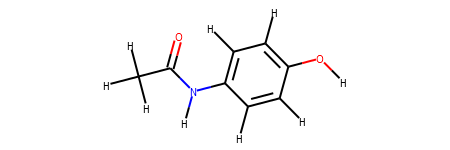

In [6]:
# AddHs function adds H atoms to a MOL (as Hs in SMILES are usualy ignored)
# GetNumAtoms() method returns a general nubmer of all atoms in a molecule including H


paracetemol_mol_with_H = Chem.AddHs(paracetemol_mol)

print('Number of total atoms in paracetamol :', paracetemol_mol_with_H.GetNumAtoms())
print('Number of atoms in paracetamol (excluding H):', paracetemol_mol.GetNumAtoms())

paracetemol_mol_with_H

### Descriptors
A number of general molecular descriptors that can also be used to featurize a molecule are provided by `rdkit.Chem.Descriptors` and `rdkit.Chem.rdMolDescriptors`. Bellow we can see some examples. More examples and a detailed descripton you can find in **RDKit** documantation.



In [7]:
# Descriptors.HeavyAtomCount returns a nubmer of all atoms in a molecule with molecular weight > 1
# Descriptors.HeavyAtomMolWt the average molecular weight of the molecule ignoring hydrogens
# Descriptors.MolLogP returns the Octanol-water partition coefficient
# Descriptors.qed returns the drug-likeness 
# Descriptors.MolW returns the Molecular weight
# Descriptors.NumRotatableBonds returns the number of rotatable bond
# ...

desc_HeavyAtomCount = Descriptors.HeavyAtomCount(paracetemol_mol)
desc_HeavyAtomMolWt = Descriptors.HeavyAtomMolWt(paracetemol_mol)
desc_MolLogP = Descriptors.MolLogP(paracetemol_mol)
desc_qed = Descriptors.qed(paracetemol_mol)
desc_MolWt = Descriptors.MolWt(paracetemol_mol)
desc_NumRotatableBonds = Descriptors.NumRotatableBonds(paracetemol_mol)

print('Number of heavy atoms in paracetamol:', desc_HeavyAtomCount)
print('Average molecular weight ignoring hydrogens:', desc_HeavyAtomMolWt)

print('logP in paracetamol:', desc_MolLogP)
print('drug-likeness:', desc_qed)
print('Molecular weight:', desc_MolWt)

# rdMolDescriptors.CalcNumRings returns the number of rings for a molecule
# rdMolDescriptors.CalcNumHBD returns the number of H-bond donors for a molecule
# rdMolDescriptors.CalcNumHBA returns the number of H-bond acceptors for a molecule
# ...

num_rings = rdMolDescriptors.CalcNumRings(paracetemol_mol)
num_H_donors = rdMolDescriptors.CalcNumHBD(paracetemol_mol)
num_H_acceptors = rdMolDescriptors.CalcNumHBA(paracetemol_mol)

print('Number of ring:', num_rings)
print('Number of H-bond donors:', num_H_donors)
print('Number of H-bond acceptors:', num_H_acceptors)



Number of heavy atoms in paracetamol: 11
Average molecular weight ignoring hydrogens: 142.093
logP in paracetamol: 1.3505999999999998
drug-likeness: 0.5950261967780849
Molecular weight: 151.165
Number of ring: 1
Number of H-bond donors: 2
Number of H-bond acceptors: 2


## Defining and viewing a set of example molecules


In [8]:
naphthalene = Chem.MolFromSmiles('c12ccccc1cccc2')
benzoxazole = Chem.MolFromSmiles('n1c2ccccc2oc1')
indane = Chem.MolFromSmiles('c1ccc2c(c1)CCC2')
skatole = Chem.MolFromSmiles('CC1=CNC2=CC=CC=C12')
benzene = Chem.MolFromSmiles('c1ccccc1')
quinoline = Chem.MolFromSmiles('n1cccc2ccccc12')

my_molecules = [naphthalene, 
                benzoxazole,
                indane,
                skatole,
                benzene,
                quinoline,
               ]

It's easy to get a look at the structure of these molecules.



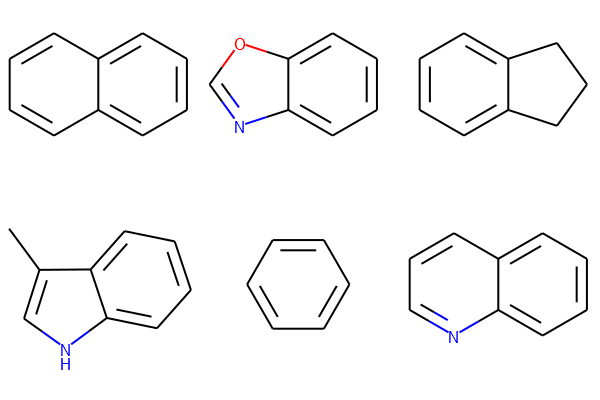

In [9]:
Draw.MolsToGridImage(my_molecules)


## Importing QM9 dataset and properties

In [10]:
from utils import get_smiles_encodings, load_data, smile_to_hot

In [11]:
properties_txt = ['logP: represents a measure of the tendency of a compound to move from the aqueous phase into lipids',
                  'Number of rotatable bonds (RBN): the number of bonds which allow free rotation around themselves',
                  'Molecular weight (MW): the weight of a molecule based on the atomic masses of all atoms in the molecule',
                  'Number of the rings (RN): the number of connected sets of atoms and bonds in which every atom and bond is a member of a cycle']

file_smiles = './dataset/QM9.txt'

# get smiles, alphabet and length of largest molecule in SMILES from the dataset
smiles, alphabet, largest_molecule_len = get_smiles_encodings(file_smiles)

In [12]:
print('QM9 dataset alphabet:', alphabet)
print('length of largest molecule:',largest_molecule_len)
print('some smiles:',smiles[2443:2449])

QM9 dataset alphabet: ['(', '#', ')', '3', '4', '=', 'F', '5', 'N', '1', 'O', '2', 'C', ' ']
length of largest molecule: 22
some smiles: ['N=C1OC2CC1C2' 'O=C1CC2CC1C2' 'O=C1CC2CC1O2' 'O=C1CN2CC1C2'
 'O=C1NC2CC1C2' 'O=C1OC2CC1C2']


In [13]:
file_properties = './dataset/properties_QM9.npz'

# load the properties: logP, RBN, MW, RN
properties = np.load(file_properties)['properties'].astype(np.float32)

In [14]:
properties

array([[  0.6361,   0.    ,  16.043 ,   0.    ],
       [  0.162 ,   0.    ,  17.031 ,   0.    ],
       [ -0.8247,   0.    ,  18.015 ,   0.    ],
       ...,
       [ -0.8808,   0.    , 120.155 ,   8.    ],
       [  0.3187,   0.    , 119.167 ,   8.    ],
       [ -0.55  ,   0.    , 121.139 ,   8.    ]], dtype=float32)

In [15]:
# Split data to train and test

X_train, X_test, y_train, y_test = load_data(smiles, properties)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
alphabet
largest_molecule_len

X_train shape: (92428,)
X_test shape: (39612,)
y_train shape: (92428, 4)
y_test shape: (39612, 4)


22

In [16]:
# Convert a single smile string to a one-hot encoding
idx = 6362
integer_encoded, onehot_smile = smile_to_hot(X_train[idx], largest_molecule_len, alphabet)

In [17]:
print('smile string:', X_train[idx])
#print('one-hot encoded smile:', onehot_smile)


mol = Chem.MolFromSmiles(X_train[idx])

#Draw.MolToImage(mol)

smile string: CC1CC(C)(O1)C#N


In [18]:
print('QM9 dataset alphabet:', alphabet)
idx = 0
integer_encoded, onehot_smile = smile_to_hot(X_train[idx], largest_molecule_len, alphabet)
print('smile string:', X_train[idx])
print('one-hot encoded smile:')
#print(onehot_smile)
print(onehot_smile.sum(axis=0))
print(integer_encoded)
print(y_train[0])
print(properties_txt[0])
print(properties_txt[1])
print(properties_txt[2])
print(properties_txt[3])





QM9 dataset alphabet: ['(', '#', ')', '3', '4', '=', 'F', '5', 'N', '1', 'O', '2', 'C', ' ']
smile string: C
one-hot encoded smile:
[ 0  0  0  0  0  0  0  0  0  0  0  0  1 21]
[12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[ 0.6361  0.     16.043   0.    ]
logP: represents a measure of the tendency of a compound to move from the aqueous phase into lipids
Number of rotatable bonds (RBN): the number of bonds which allow free rotation around themselves
Molecular weight (MW): the weight of a molecule based on the atomic masses of all atoms in the molecule
Number of the rings (RN): the number of connected sets of atoms and bonds in which every atom and bond is a member of a cycle


In [19]:
test = np.array([X_train[0], X_train[1]])
print(test)

['C' 'N']


In [25]:
z = [smile_to_hot(x, largest_molecule_len, alphabet)[1].sum(axis=0) for x in test]
print(z[0])
print(X_train.shape)

[ 0  0  0  0  0  0  0  0  0  0  0  0  1 21]
(92428,)
